**Imports**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.stats import mode
from matplotlib.collections import LineCollection
import seaborn as sns


**Part(a)- Neural Networks**

*Building dataframe from Dataset*

In [4]:
# Initialising dataframe from .csv file
df = pd.read_csv("data_Q1.csv")

# Converting into numpy arrays
training_x1 = df.iloc[:, 0].to_numpy()
training_x2 = df.iloc[:, 1].to_numpy()
training_y = df.iloc[:, 2].to_numpy()

# Calculating the length of the set
N = len(training_x1)

# Forming a N x 3 matrix 
training_x = np.array([[x1, x2, 1] for x1, x2 in zip(training_x1, training_x2)])
training_x

array([[ 9.82445982e-01,  1.00600883e+00,  1.00000000e+00],
       [ 9.96513925e-01,  9.88683591e-01,  1.00000000e+00],
       [-1.92614986e-03,  1.00686804e+00,  1.00000000e+00],
       [ 1.00449136e+00,  5.85768139e-03,  1.00000000e+00],
       [-1.45363543e-03,  4.65770066e-03,  1.00000000e+00],
       [ 1.01868726e+00, -1.41789449e-02,  1.00000000e+00],
       [ 9.94812961e-01,  1.00440582e+00,  1.00000000e+00],
       [ 9.99376015e-01,  1.00082595e+00,  1.00000000e+00],
       [-1.02910614e-03,  9.60880075e-03,  1.00000000e+00],
       [ 9.97173716e-01,  1.01784357e+00,  1.00000000e+00],
       [ 1.00142426e+00,  1.01588068e+00,  1.00000000e+00],
       [ 1.00541231e+00,  1.12644172e-03,  1.00000000e+00],
       [ 1.01340099e+00, -1.87469173e-05,  1.00000000e+00],
       [ 9.84307439e-01,  1.00631948e+00,  1.00000000e+00],
       [-5.10342874e-03,  9.88849600e-01,  1.00000000e+00],
       [-4.47771425e-03,  9.85493169e-01,  1.00000000e+00],
       [ 1.00937850e+00,  9.95274694e-01

*Initializing the parameters*

In [5]:
# Initialising a seed 
np.random.seed(123)

# Activating function 
def sigmoid(x): return 1 / (1 + np.exp(-x))

def grad_sigmoid(x): return sigmoid(x) * (1 - sigmoid(x))

# Initialising the random weights in the range of [-1, 1].
weights1 = np.random.uniform(-1, 1, (3, 3))
weights2 = np.random.uniform(-1, 1, (4, 1))

# Learning Rate
learning_rate = 0.05

# Number of iterations
max_epochs = 100

# Initialising the list to store the loss function values.
training_error = []
print(weights1)
print(weights2)

[[ 0.39293837 -0.42772133 -0.54629709]
 [ 0.10262954  0.43893794 -0.15378708]
 [ 0.9615284   0.36965948 -0.0381362 ]]
[[-0.21576496]
 [-0.31364397]
 [ 0.45809941]
 [-0.12285551]]


*Training*

**Forward Propagation** 

Step 1: Multiply input $X$ with first weight matrix $W^{(1)}$.

#### **Mathematical Calculation:**

$$H = X W^{(1)}$$

where:  
- $X$ is the **input matrix** (size: $ N \times 3 $, includes bias).  
- $W^{(1)}$  is the **weight matrix from input → hidden layer** (size: $3 \times 3$ ).  
-  H  is the **hidden layer pre-activation output** (size:  $N \times 3$ ). 

Step 2: Apply activation (sigmoid) to get hidden layer output $Z$.

Step 3: Multiply $Z$ with second weight matrix $W^{(2)}$.

#### **Mathematical Calculation:**
$$
O = Z' W^{(2)}
$$

where:  
- $ W^{(2)} $ is the **weight matrix from hidden → output layer** (size: $ 4 \times 1 $).  
- $ O $ is the **output layer pre-activation output** (size: $ N \times 1 $). 

Step 4: Apply activation (sigmoid) to get final predicted output $\hat{y}$



In [6]:
for epoch in range(max_epochs):
    
    # Forward pass : Passess the data from the input layer to hidden layer
    
    # Formation of the hidden layer from the dot product of input data and weight matrix
    H = training_x @ weights1 
    
    # Activation function .i.e normalises to 1
    Z = sigmoid(H) 

    # Appending the bias
    Z = np.hstack((Z, np.ones((N, 1))))  
    
    # Output layer 
    O = Z @ weights2
    
    # Activating Sigmoid for O 
    y_hat = sigmoid(O)
    
    # Calculating the loss 
    loss = np.mean((training_y - y_hat.flatten())**2) / 2
    
    # Appending the loss 
    training_error.append(loss)

    # Backpropagation
    temp = -(training_y - y_hat.flatten()) * grad_sigmoid(O).flatten()
    
    gradient2 = Z.T @ temp.reshape(-1, 1) / N
    
    temp = temp[:, None] * grad_sigmoid(H) @ np.diag(weights2[:-1].flatten())
    
    gradient1 = training_x.T @ temp / N
    
    # Updating the graidents
    weights2 -= learning_rate * gradient2
    weights1 -= learning_rate * gradient1

print(weights1)
print(weights2)

[[ 0.39163632 -0.43043915 -0.54238854]
 [ 0.10191988  0.44092667 -0.15308498]
 [ 0.96088692  0.36888644 -0.03549293]]
[[-0.19871811]
 [-0.307211  ]
 [ 0.46389241]
 [-0.10271182]]


*Plot*

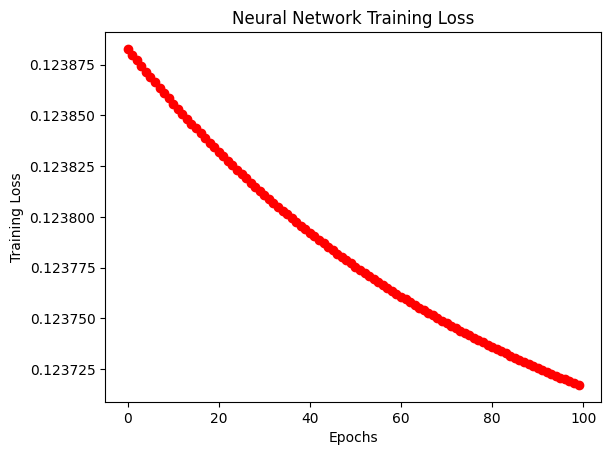

In [7]:
plt.plot(range(max_epochs), training_error, '-o', color= 'red')
plt.xlabel("Epochs")
plt.ylabel("Training Loss")
plt.title("Neural Network Training Loss")
plt.show()

**Part(b) - kNN**

*Build dataframe*

In [8]:
# Loading the data from URL
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"

# Initialising the column names for the data frame.
column_names = ["Sex", "Length", "Diameter", "Height", "Whole weight", "Shucked weight", "Viscera weight", "Shell weight", "Rings"]

# Initialising the Dataframe.
abalone = pd.read_csv(url, header=None, names=column_names)

# Dropping the column "Sex" from dataframe
abalone.drop(columns=["Sex"], inplace=True)

# Dropping the column "Rings"
X = abalone.drop(columns=["Rings"]).values

# Storing its values as features.
y = abalone["Rings"].values

# Splitting the data into training (70%) and test (30%) data sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=333)

abalone.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


*kNN - helper function*

In [9]:
def knn_predict(X_train, y_train, X_test_point, k):
    
    # Compute distances
    distances = np.linalg.norm(X_train - X_test_point, axis=1)  
    
    # Get indices of k nearest neighbors
    k_neighbors = np.argsort(distances)[:k]  
    
    # Get the corresponding labels
    k_labels = y_train[k_neighbors]  
    
    # Ensure mode() output is correctly indexed"
    most_common = mode(k_labels, keepdims=True).mode[0]
    
    return most_common

**Finding the Predicted age**

In [10]:
# Creating a new data sample.
new_point = np.array([0.569552, 0.446407, 0.154437, 1.016849, 0.439051, 0.222526, 0.291208])

#Passing the training datas along with new data sample and number of neighbors 
predicted_age = knn_predict(X_train, y_train, new_point, 3)

print("Predicted Age:", predicted_age)

Predicted Age: 11


**Calculating the Mean Squared Error after testing the model on test data.**

In [11]:
# Testing the model by passing the test data separated in above steps
predicted_ages_test = np.array([knn_predict(X_train, y_train, X_test[i], 3) for i in range(len(X_test))])

# Calculating the mean squared error of the predicted ages
MSE = np.mean((predicted_ages_test - y_test) ** 2)

print("Test Set MSE:", MSE)

Test Set MSE: 7.647527910685805


**Calcualting MSE for a wide range of k's from 1 to 50, and storing it in the list `mse_values`**

In [12]:
mse_values = []
k_values = range(1, 51)
for k in k_values:
    predicted_ages_test = np.array([knn_predict(X_train, y_train, X_test[i], k) for i in range(len(X_test))])
    mse_values.append(np.mean((predicted_ages_test - y_test) ** 2))


**Plotting the MSE(mean sqaured error) against the k(number of neighbors) and its optimal value**

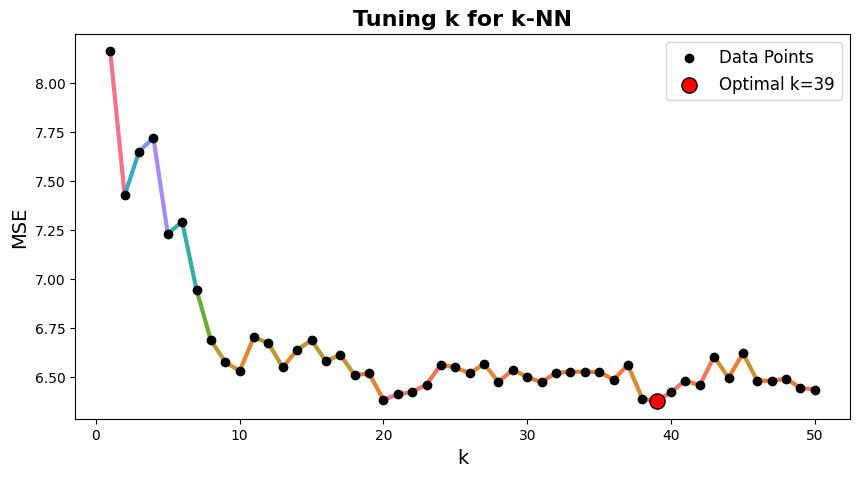

The optimal number of neighbors k is  39 with MSE(Mean Squared Error) of  6.3740031897926634


In [15]:
# Compute line segments
mse_values = np.array(mse_values)
k_values = np.array(k_values)

# Compute line segments
points = np.array([k_values, mse_values]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)


cmap = sns.color_palette("husl", as_cmap=True) 
colors = mse_values[:-1]  # Use MSE values to color segments
norm = plt.Normalize(mse_values.min(), mse_values.max())  # Normalize color range

# Create LineCollection
lc = LineCollection(segments, cmap=cmap, norm=norm, linewidth=3)
lc.set_array(colors)

# Plot
fig, ax = plt.subplots(figsize=(10, 5))
ax.add_collection(lc)
ax.scatter(k_values, mse_values, color='black', zorder=3, label="Data Points")  # Emphasize points

# Labels and Title
ax.set_xlabel("k", fontsize=14)
ax.set_ylabel("MSE", fontsize=14)
ax.set_title("Tuning k for k-NN", fontsize=16, fontweight='bold')


# Mark the optimal k
optimal_k = k_values[np.argmin(mse_values)]
optimal_mse = min(mse_values)
ax.scatter(optimal_k, optimal_mse, color='red', edgecolor='black', s=120, label=f"Optimal k={optimal_k}", zorder=4)
ax.legend(fontsize=12)

plt.show()

print("The optimal number of neighbors k is ", optimal_k, "with MSE(Mean Squared Error) of ", optimal_mse)